# **Chapter 3: Classification**
Classification adalah salah satu jenis masalah dalam supervised learning, di mana model dilatih untuk memprediksi label atau kategori dari input yang diberikan.

Tujuannya adalah agar model bisa mengelompokkan data ke dalam kelas-kelas tertentu berdasarkan pola dari data latih.




> *Notebook ini membahas tugas klasifikasi menggunakan dataset gambar tangan MNIST. Fokus awal adalah membangun model sederhana untuk mendeteksi apakah gambar merupakan angka 5 atau bukan.*




# **Import Libraries & Load Dataset**
Mulai dengan mengimpor library yang dibutuhkan dan memuat dataset MNIST dari fetch_openml, lalu memisahkan data fitur (X) dan label (y).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)  # ubah label dari string ke integer

X.shape, y.shape


((70000, 784), (70000,))

# **Visualize Sample Digits**
Untuk memastikan data betul-betul berupa gambar angka, kita visualisasikan satu sampel. Setiap gambar awalnya direpresentasikan sebagai array datar (784 panjang), lalu diubah kembali menjadi bentuk 28x28 piksel.

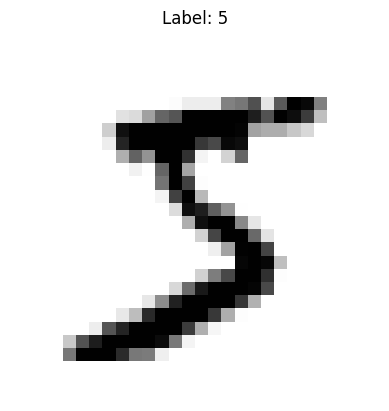

In [2]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.title(f"Label: {y[0]}")
plt.show()


# **Training a Binary Classifier**
Kita membuat model klasifikasi biner untuk memprediksi apakah gambar menunjukkan angka 5. Label akan dikonversi ke True jika 5, dan False jika bukan.

In [3]:
from sklearn.linear_model import SGDClassifier

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])


array([ True])

# **Evaluating Accuracy with Cross-Validation**
Akurasi adalah metrik sederhana, tapi bisa menyesatkan jika kelas tidak seimbang (contoh: angka 5 hanya sebagian kecil dari data). Kita evaluasi model menggunakan cross-validation untuk hasil yang lebih andal.

In [4]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.95035, 0.96035, 0.9604 ])

# **Dummy Classifier (Never Predict 5)**
Model baseline ini hanya memprediksi "bukan 5" untuk semua input. Meskipun akurasinya tinggi, ia tidak pernah mendeteksi angka 5. Ini membantu menilai apakah model kita benar-benar belajar sesuatu.

In [5]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None): return self
    def predict(self, X): return np.zeros((len(X),), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.91125, 0.90855, 0.90915])

# **Confusion Matrix and Precision/Recall**
Confusion matrix menunjukkan jumlah prediksi benar dan salah untuk masing-masing kelas. Precision menunjukkan seberapa andal prediksi positif, sedangkan recall menunjukkan seberapa banyak angka 5 yang berhasil ditangkap oleh model.

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

confusion_matrix(y_train_5, y_train_pred)

precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred), f1_score(y_train_5, y_train_pred)


(0.8370879772350012, 0.6511713705958311, 0.7325171197343847)